### AI Post-Module Assignment:
Given a set of reviews as a training set, develop a Deep Learning model that predicts the last two words in each sentence of each review.

#### Developer:
Janki Shah

In [1]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.models import load_model
from pickle import dump

ModuleNotFoundError: No module named 'keras'

In [3]:
# Import Data as text
with open('review.txt', 'r') as f: 
    data = f.read() # read the data as string

In [31]:
#Count word frequency
words_in_text = data.split()
print('Total number of words in review data:', len(words_in_text))
print("Total unique words:",len(set(words_in_text)))

#Calculate each word frequency in review data
word_freq = {}
for words in words_in_text:
    word_freq[words] = word_freq.get(words, 0) + 1
    
#Remove words with less than 5 frequency
#less_freq_words = set()
#for key, value in word_freq.items():
#    if word_freq[key] < 5:
#        less_freq_words.add(key)

#final_words_in_text = set(words_in_text) - less_freq_words
#print("Total unique words with > 5 frequency:",len(final_words_in_text))

Total number of words in review data: 267794
Total unique words: 12184


In [5]:
# prepare the tokenizer on the source text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 12185


In [6]:
# create line-based sequences
sequences = list()
for line in data.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 239706


In [7]:
# pad input sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Maximum Sequence Length: %d' % max_length)

Maximum Sequence Length: 14


In [8]:
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

In [9]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 13, 10)            121850    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_1 (Dense)              (None, 12185)             621435    
Total params: 755,485
Trainable params: 755,485
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model_hist = model.fit(X, y, validation_split=0.20, epochs=100, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 191764 samples, validate on 47942 samples
Epoch 1/100
 - 227s - loss: 6.6889 - acc: 0.0409 - val_loss: 6.5086 - val_acc: 0.0597
Epoch 2/100
 - 229s - loss: 6.0363 - acc: 0.0886 - val_loss: 6.0549 - val_acc: 0.1120
Epoch 3/100
 - 236s - loss: 5.5848 - acc: 0.1265 - val_loss: 5.8729 - val_acc: 0.1294
Epoch 4/100
 - 231s - loss: 5.3448 - acc: 0.1427 - val_loss: 5.7986 - val_acc: 0.1397
Epoch 5/100
 - 224s - loss: 5.1761 - acc: 0.1533 - val_loss: 5.7635 - val_acc: 0.1464
Epoch 6/100
 - 221s - loss: 5.0452 - acc: 0.1615 - val_loss: 5.7554 - val_acc: 0.1504
Epoch 7/100
 - 222s - loss: 4.9371 - acc: 0.1674 - val_loss: 5.7431 - val_acc: 0.1516
Epoch 8/100
 - 225s - loss: 4.8457 - acc: 0.1733 - val_loss: 5.7488 - val_acc: 0.1546
Epoch 9/100
 - 223s - loss: 4.7697 - acc: 0.1780 - val_loss: 5.7484 - val_acc: 0.1546
Epoch 10/100
 - 222s - loss: 4.7048 - acc: 0.1813 - val_loss: 5.7592 - val_acc: 0.1554
Epoch 11/100
 - 225s - loss: 4.6495 - ac

Epoch 92/100
 - 235s - loss: 3.8743 - acc: 0.2630 - val_loss: 6.3376 - val_acc: 0.1440
Epoch 93/100
 - 233s - loss: 3.8728 - acc: 0.2625 - val_loss: 6.3507 - val_acc: 0.1430
Epoch 94/100
 - 238s - loss: 3.8700 - acc: 0.2634 - val_loss: 6.3470 - val_acc: 0.1448
Epoch 95/100
 - 234s - loss: 3.8693 - acc: 0.2634 - val_loss: 6.3585 - val_acc: 0.1423
Epoch 96/100
 - 235s - loss: 3.8670 - acc: 0.2639 - val_loss: 6.3622 - val_acc: 0.1429
Epoch 97/100
 - 235s - loss: 3.8647 - acc: 0.2640 - val_loss: 6.3618 - val_acc: 0.1446
Epoch 98/100
 - 237s - loss: 3.8638 - acc: 0.2640 - val_loss: 6.3592 - val_acc: 0.1439
Epoch 99/100
 - 242s - loss: 3.8616 - acc: 0.2647 - val_loss: 6.3721 - val_acc: 0.1429
Epoch 100/100
 - 233s - loss: 3.8607 - acc: 0.2645 - val_loss: 6.3675 - val_acc: 0.1429


In [11]:
results = model.evaluate(X, y)
print("Model evaluation result:\n", model.metrics_names, results)

239706/239706 [==============================] - 80s 335us/step
Model evaluation result:
 ['loss', 'acc'] [4.276246258261887, 0.25054024513424367]


In [36]:
# save the model to file
model.save('final_model_Full_100.h5')
# save the tokenizer
dump(tokenizer, open('final_tokenizer_Full_100.pkl', 'wb'))

In [13]:
# load the model
# model = load_model('model_Full_100.h5') # Execute the code in case 

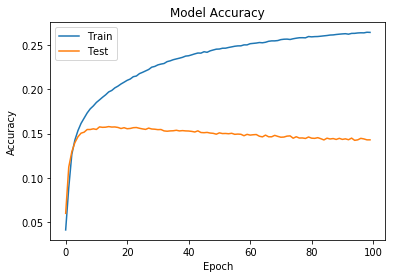

In [14]:
# Plot training & validation accuracy values
plt.plot(model_hist.history['acc'])
plt.plot(model_hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

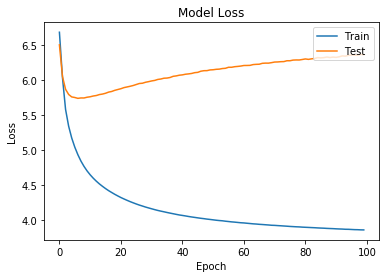

In [15]:
# Plot training & validation loss values
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [26]:
# Predict words
def predict_last_two_words(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)

        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text

In [27]:
# Prediction of last two words

actual = []
predicted = []
for line in data.split('\n'):
    
    #Split sentence and Get actual value
    line_list = line.split(' ')
    first_sentence = ' '.join(line_list[:-2])
    actual_last_two_words = line_list[-2] + ' ' + line_list[-1]
    
    #Make a prediction
    pred_sentence = predict_last_two_words(model, tokenizer, max_length-1, first_sentence, 2)

    #Split predicted sentence and Get predicted value
    pred_sentence_list = pred_sentence.split(' ')
    pred_last_two_words = pred_sentence_list[-2] + ' ' + pred_sentence_list[-1]
    
    #append in list
    actual.append(actual_last_two_words)
    predicted.append(pred_last_two_words)

In [28]:
#Examples 
print(predict_last_two_words(model, tokenizer, max_length-1, "not much to write about here but it does exactly what its", 2))
print(predict_last_two_words(model, tokenizer, max_length-1, "i guess i should read instructions", 2))

not much to write about here but it does exactly what its supposed to
i guess i should read instructions of the


In [29]:
#Create Actual vs Predicted list for last two words
actual_predicted_list = []
for i in range(0, len(actual)-1):
    if actual[i] == predicted[i]:
        actual_predicted_list.append(True)
    else:
        actual_predicted_list.append(False)

In [30]:
# Calculate total count of Correct and Incorrect
total_true_words_count = actual_predicted_list.count(True)
total_false_words_count = actual_predicted_list.count(False)
total_words = len(actual_predicted_list)

In [25]:
# Word prediction accuracy for the word prediction problem 
T_word_accuracy = round((total_true_words_count/total_words)* 100,2)
F_word_accuracy = round((total_false_words_count/total_words)* 100,2)
print(T_word_accuracy,'% of words were predicted correctly.')
print(F_word_accuracy,'% of words were predicted incorrectly.')

10.46 % of words were predicted correctly.
89.54 % of words were predicted incorrectly.


##### Reference: 
We used code from the following link to predict the last two words (One word In, One Word out sequence - line by line approach).
https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/